# KLASIFIKACIJA SLIKA

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

podaci = X_train

# ANALIZA SKUPA PODATAKA

In [2]:
podaci.shape

(60000, 28, 28)

In [3]:
len(y_train)

60000

In [4]:
y_train.shape

(60000,)

In [5]:
import numpy as np

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
len(y_test)

10000

# PRETPROCESIRANJE PODATAKA

In [9]:
from matplotlib import pyplot as plt

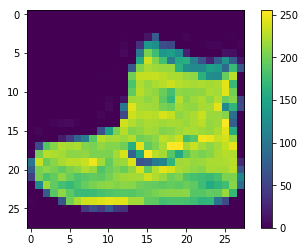

In [10]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# Reshape the images to 28x28x1 and normalize the pixel values to the range [0, 1]
X_train = X_train.reshape((-1, 28, 28, 1)) / 255.0
X_test = X_test.reshape((-1, 28, 28, 1)) / 255.0

In [12]:
klase = ['majica', 'pantalone', 'dzemper', 'haljina', 'kaput', 'sandale', 'kosulja', 'patike', 'torba', 'cizme']

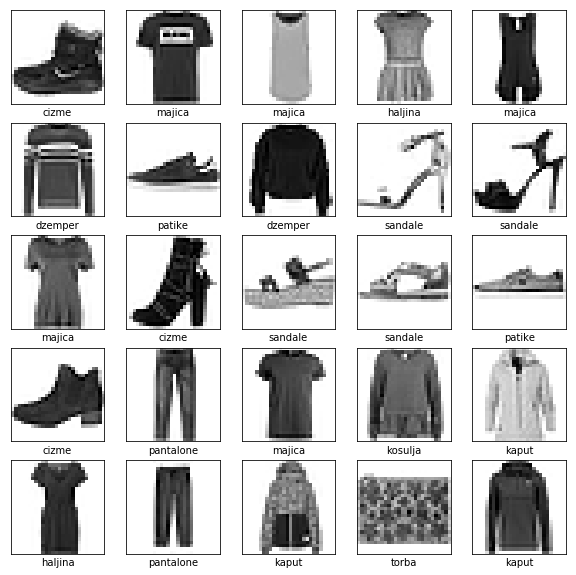

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(podaci[i], cmap=plt.cm.binary)
    plt.xlabel(klase[y_train[i]])
plt.show()

# KREIRANJE MODELA I DEFINISANJE SLOJEVA

In [14]:
# Define the CNN model
#model = tf.keras.models.Sequential([
 #   tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  #  tf.keras.layers.MaxPooling2D((2, 2)),
   # tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   # tf.keras.layers.MaxPooling2D((2, 2)),
   # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
   # tf.keras.layers.Flatten(),
   # tf.keras.layers.Dense(128, activation='relu'),
   # tf.keras.layers.Dense(10, activation='softmax')
#])

#neuronska mreza
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compile the model
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# OBUČAVANJE MODELA

In [15]:
# Train the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5035 - accuracy: 0.8224
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3406 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3151 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2972 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2818 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2705 - accuracy: 0.8992
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2597 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2495 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

# EVALUACIJA TAČNOSTI

In [16]:
# Evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3253 - accuracy: 0.8854


[0.3253203332424164, 0.8853999972343445]

# KORIŠĆENJE MODELA

In [17]:
output = model.predict(X_train)

In [18]:
import numpy as np

In [19]:
predvidjene_kategorije = [np.argmax(output[i]) for i in range(len(output))]

# DEFINISANJE TAČKE

In [20]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# ULAZNI PODACI FAZI LOGIKE

In [21]:
class FuzzyInput:
    def __init__(self, name, points, x_test):
        self.points = points
        self.name = name
        self.x_test = x_test
        self.mu = self.calcMu()
        
    def calcMu(self):
        if self.x_test <= self.points[0].x:
            return self.points[0].y
        elif self.x_test >= self.points[-1].x:
            return self.points[-1].y
        
        for p1, p2 in zip(self.points, self.points[1:]):
            if self.x_test >= p1.x and self.x_test <= p2.x:
                if p1.y == 1 and p2.y == 1:
                    return self.points[0].y
                return FuzzyInput.line_through_two_points(p1, p2)(self.x_test)
        
    @staticmethod
    def line_through_two_points(a, b): 
        c = (b.x - a.x) / (b.y - a.y)
        return lambda x_test: (x_test - a.x) / c + a.y

In [22]:
from statistics import mean

# IZLAZNI PODACI FAZI LOGIKE

In [23]:
class FuzzyOutput:
    def __init__(self, name, points):
        self.name = name
        self.points = points
        self.mu = 0
        self.c = self.calcC()
        
    def calcC(self):
        return mean([p.x for p in self.points if p.y == 1])

In [24]:
from enum import Enum, unique, auto

# @unique
class LogicOp(Enum):
    AND = auto()
    OR = auto()
    XOR = auto()

# PRAVILA FAZI LOGIKE

In [25]:
class Rule:
    def __init__(self, input1, input2, output, operator):
        if operator == LogicOp.AND:
            output.mu = max(output.mu, min(input1.mu, input2.mu))
        else:
            output.mu = max(output.mu, max(input1.mu, input2.mu))

# PODELA NA KLASE

In [26]:
#klase
#indeksi: 
#majica 0
#pantalone 1
#dzemper 2
#haljina 3
#kaput 4
#sandale 5
#kosulja 6
#patike 7
#torba 8
#cizme 9
klase = ['majica', 'pantalone', 'dzemper', 'haljina', 'kaput', 'sandale', 'kosulja', 'patike', 'torba', 'cizme']
input1_vreme = [25, 10, 7, 28, 10, 30, 26, 15, 15, 5] #temperature na kojima se nosi odredjeni odevni predmet
input2_formalnost = [0.1, 0.6, 0.4, 0.7, 0.85, 0.65, 0.95, 0, 0.9, 0.8] #stepen formalnosti od 0 do 1
#npr: majica -> moze da se nosi na 25 stepeni i formalni je odevni predmet 10%

# DEFAZIFIKACIJA

In [27]:
def defuzzify(ys):
    a = 0
    b = 0
    for y in ys:
        a += y.mu * y.c
        b += y.mu + 1e-4
    return a / b 

# ODABIR RANDOM SLIKA

In [28]:
import random
niz = []
for i in range(5):
    a = random.randint(i*2000, (i+1)*2000)
    niz.append(a)
    b = random.randint(i*2000, (i+1)*2000)
    niz.append(b)
slike = []
for i in niz:
    slike.append(predvidjene_kategorije[i])

In [29]:
niz

[564, 394, 2540, 2801, 4902, 4997, 6032, 6470, 9797, 8745]

In [30]:
slike 

[0, 8, 1, 8, 8, 5, 9, 0, 3, 8]

In [31]:
import matplotlib.pyplot as plt

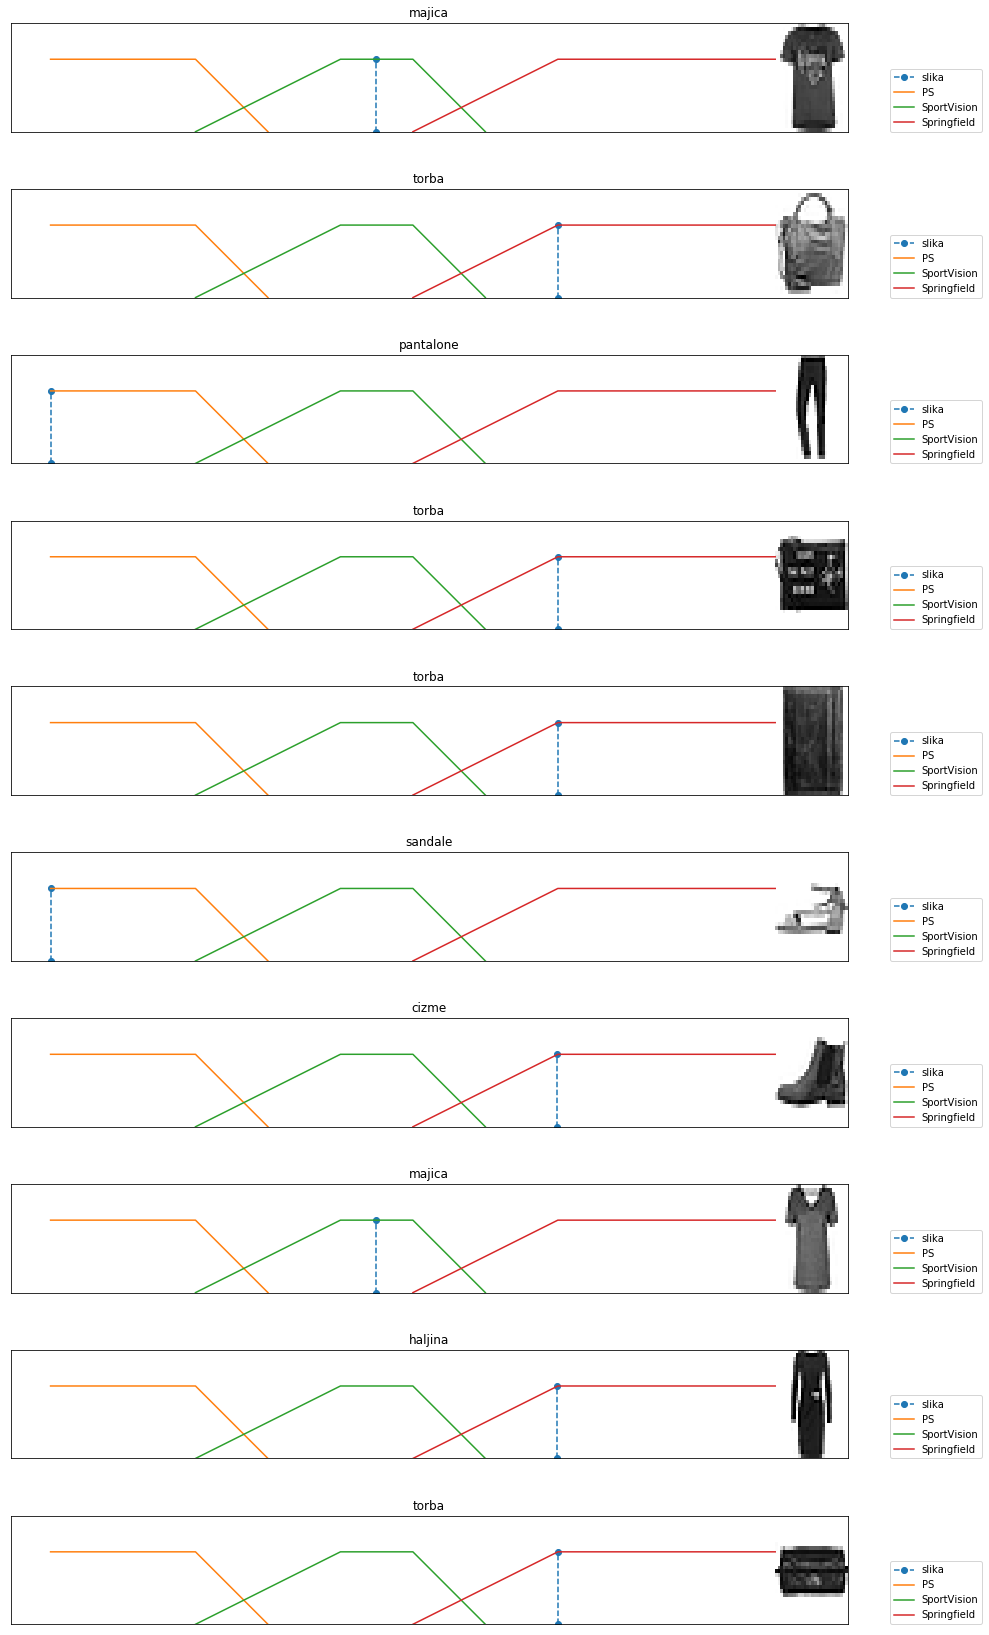

In [32]:
plt.figure(figsize=(15,30))
k = 1
for j in range(10):
    i = slike[j]
    vreme = [] #za odredjeni komad odece odredjujemo za kakvo vreme moze da se nosi
    vreme.append(FuzzyInput('hladno', [Point(7,1), Point(13,0)], input1_vreme[i]))
    vreme.append(FuzzyInput('umereno', [Point(11,0), Point(15,1), Point(23,1), Point(26,0)], input1_vreme[i]))
    vreme.append(FuzzyInput('toplo', [Point(25,0), Point(30,1)], input1_vreme[i]))

    formalnost = [] #za odredjeni komad odece odredjujemo koliko je formalan
    formalnost.append(FuzzyInput('neformalno', [Point(0.4,1), Point(0.5,0)], input2_formalnost[i]))
    formalnost.append(FuzzyInput('umereno', [Point(0.45,0), Point(0.55,1), Point(0.65,1), Point(0.7,0)], input2_formalnost[i]))
    formalnost.append(FuzzyInput('formalno', [Point(0.65,0), Point(1,1)], input2_formalnost[i]))

    vrednost = []
    vrednost.append(FuzzyOutput('PS', [Point(2,1), Point(3,0)]))
    vrednost.append(FuzzyOutput('SportVision', [Point(2,0), Point(4,1), Point(5,1), Point(6,0)]))
    vrednost.append(FuzzyOutput('Springfild', [Point(5,0), Point(7,1)]))
    
    pravila = []

    pravila.append(Rule(vreme[2], formalnost[2], vrednost[2], LogicOp.AND))
    pravila.append(Rule(vreme[1], formalnost[2], vrednost[2], LogicOp.AND))
    pravila.append(Rule(vreme[0], formalnost[2], vrednost[2], LogicOp.AND))
    pravila.append(Rule(vreme[2], formalnost[1], vrednost[0], LogicOp.AND))
    pravila.append(Rule(vreme[0], formalnost[1], vrednost[0], LogicOp.AND))
    pravila.append(Rule(vreme[0], formalnost[0], vrednost[0], LogicOp.AND))
    pravila.append(Rule(vreme[1], formalnost[0], vrednost[1], LogicOp.AND))
    
    #u pravilima smo iskoristili vreme i formalnost kako bi odredili u kojoj prodavnici mozemo da kupimo nesto
    #ukoliko imamo npr. majicu, majica moze da se obuce na 25 stepeni, i formalnost je 0.1
    #vidimo da je to toplo vreme i neformalno, tako da vrednost treba da joj bude -> SportVision
    #to znaci da mozemo majicu da kupimo u SportVision-u
    
    plt.subplot(10,1,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(podaci[niz[j]], cmap=plt.cm.binary, extent=[10,11,0,1.5])
    x = defuzzify(vrednost)
   # plt.axvline(x, color='red', linestyle='--')
    plt.plot([x, x], [0, 1], 'o--')
    plt.plot([0, 2, 3], [1, 1, 0])
    plt.plot([2, 4, 5, 6], [0, 1, 1, 0])
    plt.plot([5, 7, 10], [0, 1, 1])
    plt.title(klase[i])
    plt.legend(['slika','PS', 'SportVision', 'Springfield'], loc=[1.05,0])
    
    #print(defuzzify(vrednost))
    #plt.ylabel(defuzzyfy(vrednost))
    #print(defuzzify(vrednost))
plt.show()